# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

## Вы научитесь:
* применять библиотеку SciPy для минимизации функций
* делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

## Введение

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

## Материалы
* Справка по функциям пакета scipy.optimize: [Optimization and root finding](http://docs.scipy.org/doc/scipy/reference/optimize.html)
* Matplotlib User Guide: [User’s Guide](http://matplotlib.org/users/index.html)

## Инструкция по выполнению
Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. Десятичные дроби записывайте через точку.

## Задача 1. Минимизация гладкой функции

* Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

In [1]:
import scipy.linalg
import scipy.optimize
from numpy import sin, exp, array
import matplotlib.pyplot as plt

%matplotlib inline

* В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

* Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [2]:
f_x = lambda x: sin(x / 5.0) * exp(x / 10.0) + 5 * exp(-x / 2.0)
interval = array([1, 30])

* Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")

* Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [3]:
for i in range(1, 4 + 1):
    print
    print scipy.optimize.minimize(f_x, i)
    print


      fun: 1.7452682903319905
 hess_inv: array([[ 6.02525335]])
      jac: array([ -7.45058060e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 4.13628823])


      fun: 1.7452682903447336
 hess_inv: array([[ 5.98752645]])
      jac: array([ -2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627628])


      fun: 1.7452682905867012
 hess_inv: array([[ 5.94245992]])
      jac: array([ -9.16421413e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 4.13623323])


      fun: 1.7452682904133416
 hess_inv: array([[ 5.93460225]])
      jac: array([ -5.18560410e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: ar

* Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [4]:
minimized_bfgs = scipy.optimize.minimize(f_x, 2, method='BFGS')
print minimized_bfgs
print
print round(minimized_bfgs.fun, 2)

      fun: 1.7452682903447336
 hess_inv: array([[ 5.98752645]])
      jac: array([ -2.04145908e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627628])

1.75


* Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [5]:
minimized_bfgs = scipy.optimize.minimize(f_x, 30, method='BFGS')
print minimized_bfgs
print
print round(minimized_bfgs.fun, 2)

      fun: -11.898894665981265
 hess_inv: array([[ 1.67840334]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 25.88019347])

-11.9


* Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

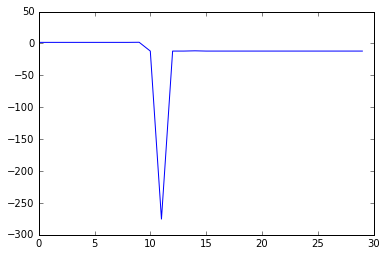

In [6]:
results = list()
for i in xrange(1, 30 + 1):
    results.append(scipy.optimize.minimize(f_x, i, method='BFGS').fun)

plt.plot(results)
plt.show()

## Задача 2: глобальная оптимизация

* Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
* Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.

* Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

* Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [7]:
minimized_diff_ev = scipy.optimize.differential_evolution(f_x, [interval])
print minimized_diff_ev
print
print round(minimized_diff_ev.fun, 2)

     fun: array([-11.89889467])
     jac: array([  5.68434189e-06])
 message: 'Optimization terminated successfully.'
    nfev: 66
     nit: 3
 success: True
       x: array([ 25.8802025])

-11.9


* Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

* Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [8]:
print "BFGS: number of executed functions:", minimized_bfgs.nfev, "and number of iteratons:", minimized_bfgs.nit
print "Differential evolution: number of executed functions:", minimized_diff_ev.nfev, "and number of iteratons:", minimized_diff_ev.nit

BFGS: number of executed functions: 18 and number of iteratons: 5
Differential evolution: number of executed functions: 66 and number of iteratons: 3


## Задача 3. Минимизация негладкой функции

* Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [9]:
h_x = lambda x: int(f_x(x))

* Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

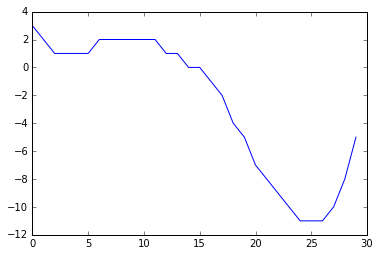

In [10]:
x_y = [h_x(x) for x in xrange(1, 30 + 1)]
plt.plot(x_y)
plt.show()

* Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [11]:
minimize_bfgs_2 = scipy.optimize.minimize(h_x, 30, method="BFGS")
print minimize_bfgs_2
print
print minimize_bfgs_2.fun

      fun: -5
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])

-5


* Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [12]:
minimize_diff_ev_2 = scipy.optimize.differential_evolution(h_x, [interval])
print minimize_diff_ev_2
print
print minimize_diff_ev_2.fun

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([ 26.56129045])

-11.0


* Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

In [13]:
results = list()
for i in range(1, 30 + 1):
    try:
        minimized = scipy.optimize.minimize(h_x, i, method="BFGS").fun
        print i, minimized
        results.append(minimized)
        
    # given OverflowError in x=0
    except OverflowError:
        print i, '-inf'

1 3
2 2
3 1
4 1
5 1
6 1
7 2
8 2
9 2
10 2
11 2
12 2
13 1
14 1
15 0
16 0
17 -1
18 -2
19 -4
20 -5
21 -7
22 -8
23 -9
24 -10
25 -11
26 -11
27 -11
28 -10
29 -8
30 -5


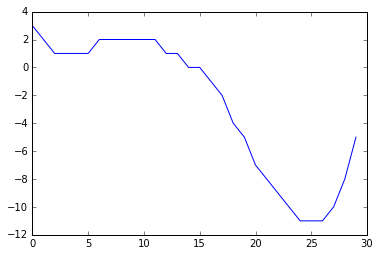

In [14]:
plt.plot(results)
plt.show()

* Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.